# Buying Used Car
This is a project to determine how to get a good deal for buying car. I use Linear Regression to visualize the data and better understand the relationships between the price of the car and other columns in the data set. 

---

Libraries used: `Pandas, Numpy, Matplotlib, Seaborn, SciKitLearn`



In [4]:
#@title Imports { vertical-output: true, display-mode: "both" }
import pandas as pd 
import os
import gdown
gdown.download('https://drive.google.com/uc?id=1nDjHLBMBZ3THSck1Ah3XyhgtRHIBT2Ec', 'raw-car-data', True)
data_path  = 'raw-car-data'
datad.read_csv(data_path)

##View Data Table  




In [5]:
#show the first five rows of the table as well as their names. 
data.head() 

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


In [ ]:
#only show fuel column
data[['Fuel_Type']].head()

,Fuel_Type
0,Petrol
1,Diesel
2,Petrol
3,Petrol
4,Diesel


In [6]:
# use the 'len' method to see how many rows are in our dataframe
print(len(data))


301


##  **Visualizing the Data** 


<Axes: xlabel='Age', ylabel='Selling_Price'>

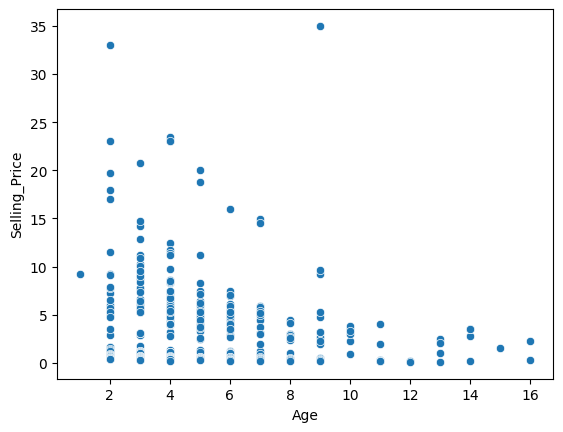

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Each dot is a single example (row) from the dataframe, with its 
# x-value as `Age` and its y-value as `Selling_Price`
#To use the  `scatterplot` tool from the `seaborn` plotting package... do the following: 
#sns.scatterplot(x = 'feature_column', y = 'target_column', data = source_data_frame)
sns.scatterplot(x = 'Age', y = 'Selling_Price', data = data)

In [8]:
# to count the number of Petrol vs. Diesel vs. CNG cars
data.groupby('Fuel_Type').count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


`catplot` is for visualizing categorical data


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


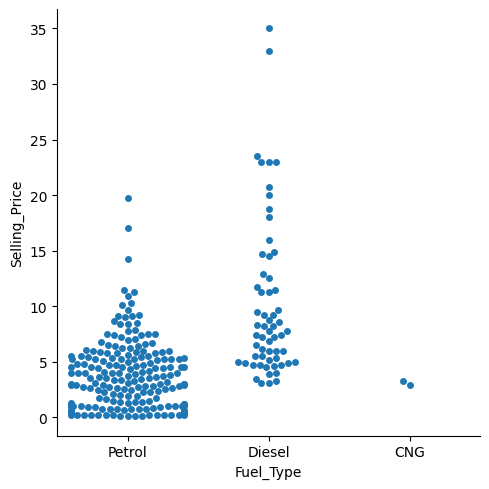

In [10]:
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = data, kind = 'swarm')

Price vs. Kms_Driven


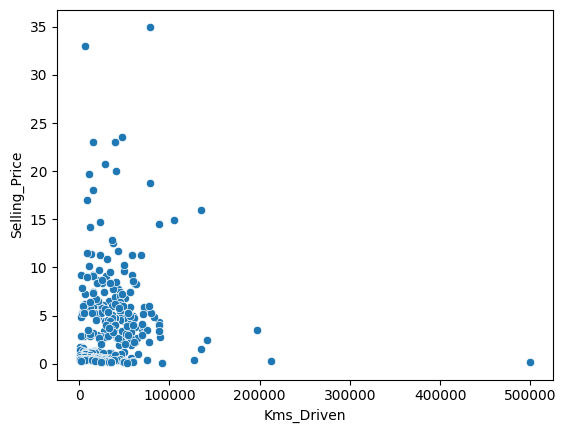

In [11]:
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = data);

For __ variable, do we expect a car to be more or less expensive? 

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


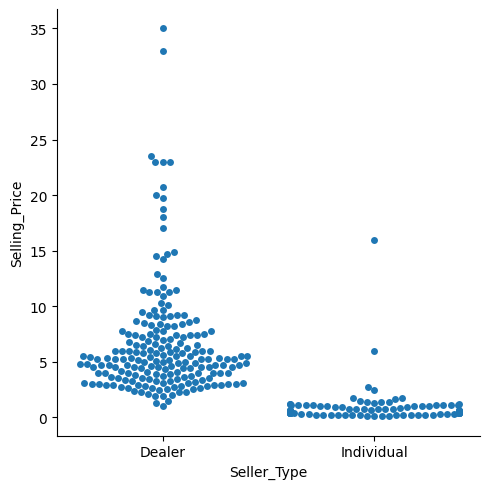

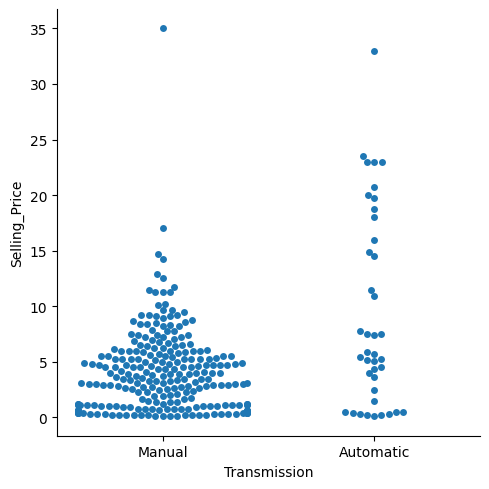

In [12]:
#@title  { display-mode: "code" }
### YOUR CODE HERE
sns.catplot(x = 'Seller_Type', y = 'Selling_Price', data = data, kind = 'swarm')
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = data, kind = 'swarm')
### END CODE

## Quantifying the relationship between age and selling price


### Linear Regression

Linear regression: 
-  Statistical approach to find and determine a relationship among an independent variable `x` and a dependent variable `y`. 
- In this project: `x` = `Age` and `y` is `Selling_Price`. 
- In the below equation, linear regression helps find the `m` and `b` that best relates our variables.

$y= mx + b$

LINEAR REGRESSION creates line that 'summarizes' the story that the data tells us. 

### Linear Regression in Python

We'll use sklearn to run our linear regression below

In [16]:
import sklearn
from sklearn import linear_model
import numpy as np    

x = data['Age'].values
x = x[:, np.newaxis]
y = data['Selling_Price'].values

# set up our model
linear = linear_model.LinearRegression(fit_intercept = True)

# train the model 
linear.fit(x, y)

LinearRegression()

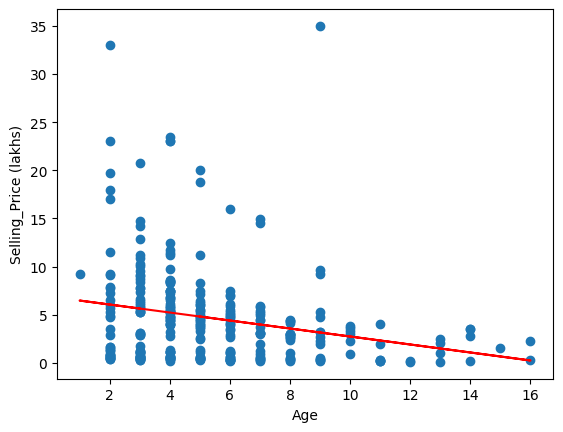

In [17]:
#@title Visualize the fit with this cell!
import matplotlib.pyplot as plt

y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red')

plt.scatter(x, y)
plt.xlabel('Age') # set the labels of the x and y axes
plt.ylabel('Selling_Price (lakhs)')
plt.show()

Remember! We were trying to find the best `b` and `m` to capture our data's story. We can grab this from the trained model. 

In [18]:
print('Our m is %0.2f lakhs/year'%linear.coef_)

Our m is -0.42 lakhs/year


`m` says: The more recent a car is by one year, the selling price is `m` lakhs higher. 

### Case Scenario

We must decide between a brand new car (2020) and the same model that was 3 years older (2017). How much cheaper should the older car by our model?

To complete the equation, we still need our intercept `b`

In [25]:
print('Our b is %0.2f lakhs'%linear.intercept_)

Our b is 6.89 lakhs


### Case Scenario #2

I want to to buy a nice used car. My car is a 2015 model and he offers to sell it for 7 lakh. Should I take it? If not, how much is a good price to take it for? 

In [23]:
#@title  { display-mode: "code" }

print('Our equation is Price = -0.42 lakhs/year * age + 6.89 lakhs')
print('Therefore, our fair price is %0.2f lakhs'%(-0.42*5.0+6.89))

Our equation is Price = -0.42 lakhs/year * age + 6.89 lakhs
Therefore, our fair price is 4.79 lakhs


### Multiple Linear Regression: Using multiple inputs 

We can try to make our model better by using multiple input variables, like `Kms_Driven` and `Transmission`. 

`Transmission` = categorical variable. To use linear regression, it must be numeric. Let's transform `Transmission` to a numeric variable by replacing `Manual` with `1` and `Automatic` with `0`.

In [20]:
data['TransmissionNumber'] = data['Transmission'].replace({'Manual':1, 'Automatic':0})

In [21]:
data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,TransmissionNumber
0,ritz,5,3.35,27000,Petrol,Dealer,Manual,1
1,sx4,6,4.75,43000,Diesel,Dealer,Manual,1
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual,1
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual,1
4,swift,5,4.60,42450,Diesel,Dealer,Manual,1


Let's now run our multiple linear regression on our dataset

In [ ]:
x = data[['Age', 'TransmissionNumber', 'Kms_Driven']].values

# set up our model
multiple = linear_model.LinearRegression(fit_intercept = True)

# train the model 
multiple.fit(x, y)

How well did it do compared to our simple linear regression from before? We can actually compare the two with their 'scores'! The score is known as r-squared ($R^2$).

In [28]:
print('Our single linear model had an R^2 of: %0.3f'%linear.score(x[:,[0]], y))

Our single linear model had an R^2 of: 0.056


In [32]:
print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(x, y))

Our multiple linear model had an R^2 of: 0.203


In real life, you wouldn't buy a car based on a single variable like `Age`. You would take into account a lot of different variables like our multiple linear model did!

Include Seller Price


In [39]:
data['SellerNumber'] = data['Seller_Type'].replace({'Dealer':1, 'Individual':0})

x = data[['Age', 'TransmissionNumber', 'Kms_Driven', 'SellerNumber']].values
print(x.shape)

# set up our model
multiple = linear_model.LinearRegression(fit_intercept = True)

# train the model 
multiple.fit(x, y)

prediction = multiple.predict(x)

print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(x, y))

(301, 4)
Our multiple linear model had an R^2 of: 0.462


### Comparing Car's Predicted Price to Actual

Which cars are a good deal, and which are overpriced. 

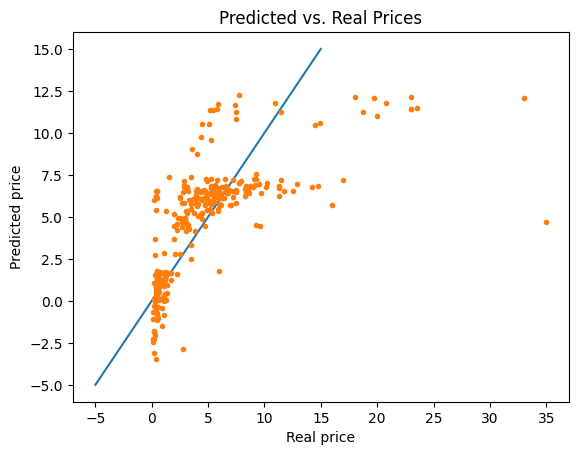

In [40]:
#@title  { display-mode: "code" }
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.plot(y, prediction, '.')
plt.show()

In [41]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data['Prediction'] = prediction
print (data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    6.032870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    5.713381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    7.177459
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    4.608766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    6.135938
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...
296     city    3           9.50       33988    Diesel      Dealer       Manual                   1             1    6

Now - assuming for now that the predicted scores are good ones - let's figure out the cars that are especially good or bad deals by comparing the real price to the predicted price.

Come up with a way to calculate the "Deal Score", and add a new column to the data frame. A car with a high Deal Score has a low true cost compared to its predicted value, while a car with a low Deal Score is overpriced. 

In [43]:
data['deal_score'] = data['Prediction']-data['Selling_Price']
print (data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction  deal_score
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    6.032870    2.682870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    5.713381    0.963381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    7.177459   -0.072541
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    4.608766    1.758766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    6.135938    1.535938
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...         ...
296     city    3           9.50  

10 most overpriced cars and the 10 cars that are the best deal.

In [46]:
#@title  { display-mode: "code" }
sorted_data = data.sort_values("deal_score")
best_deals = sorted_data.tail(10)
most_overpriced = sorted_data.head(10)
print ("these are the best deals")
print("-------------------------")
print (best_deals)
print ("these are the worst deals")
print("-------------------------")
print (most_overpriced)

these are the best deals
-------------------------
             Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction  deal_score
196         Activa 3g   11           0.17      500000    Petrol  Individual    Automatic                   0             0    6.035551    5.865551
77            corolla   15           1.50      135154    Petrol      Dealer    Automatic                   0             1    7.370486    5.870486
40             baleno    3           5.85       24524    Petrol      Dealer    Automatic                   0             1   11.747177    5.897177
177  Honda Activa 125    3           0.35       24000    Petrol  Individual    Automatic                   0             0    6.269951    5.919951
252              brio    4           5.40       31427    Petrol      Dealer    Automatic                   0             1   11.367002    5.967002
221               i20    6           4.50       32000    Petrol    

Here's the graphing code again from earlier. This time, plot the best deals in one color, the most overpriced cars in another color, and the other cars in a third color. Do your calculations align with your guesses from looking at the graph? What happens if you change your method of calculating the Deal Score?

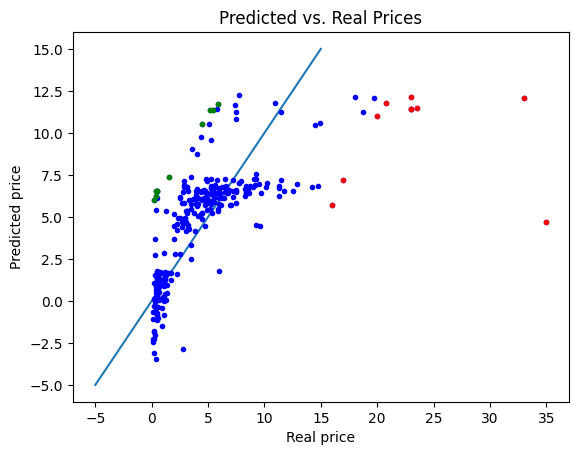

In [48]:
#@title  { display-mode: "code" }
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.plot(data.Selling_Price,data.Prediction,'b.')
plt.plot(best_deals.Selling_Price,best_deals.Prediction,'g.')
plt.plot(most_overpriced.Selling_Price,most_overpriced.Prediction,'r.')
plt.show()